## Problem statement : To build prediction model on multiple regression on prod data

### 1.Import the libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### 2.Data Collection 

In [148]:
df = pd.read_csv('C:/Users/Pritam/Downloads/unconv_MV_v5.csv')

In [149]:
df.shape

(200, 8)

In [150]:
df.head(2)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205


In [151]:
# pairplot of whole data for just checking which columns are linearly regressed to output

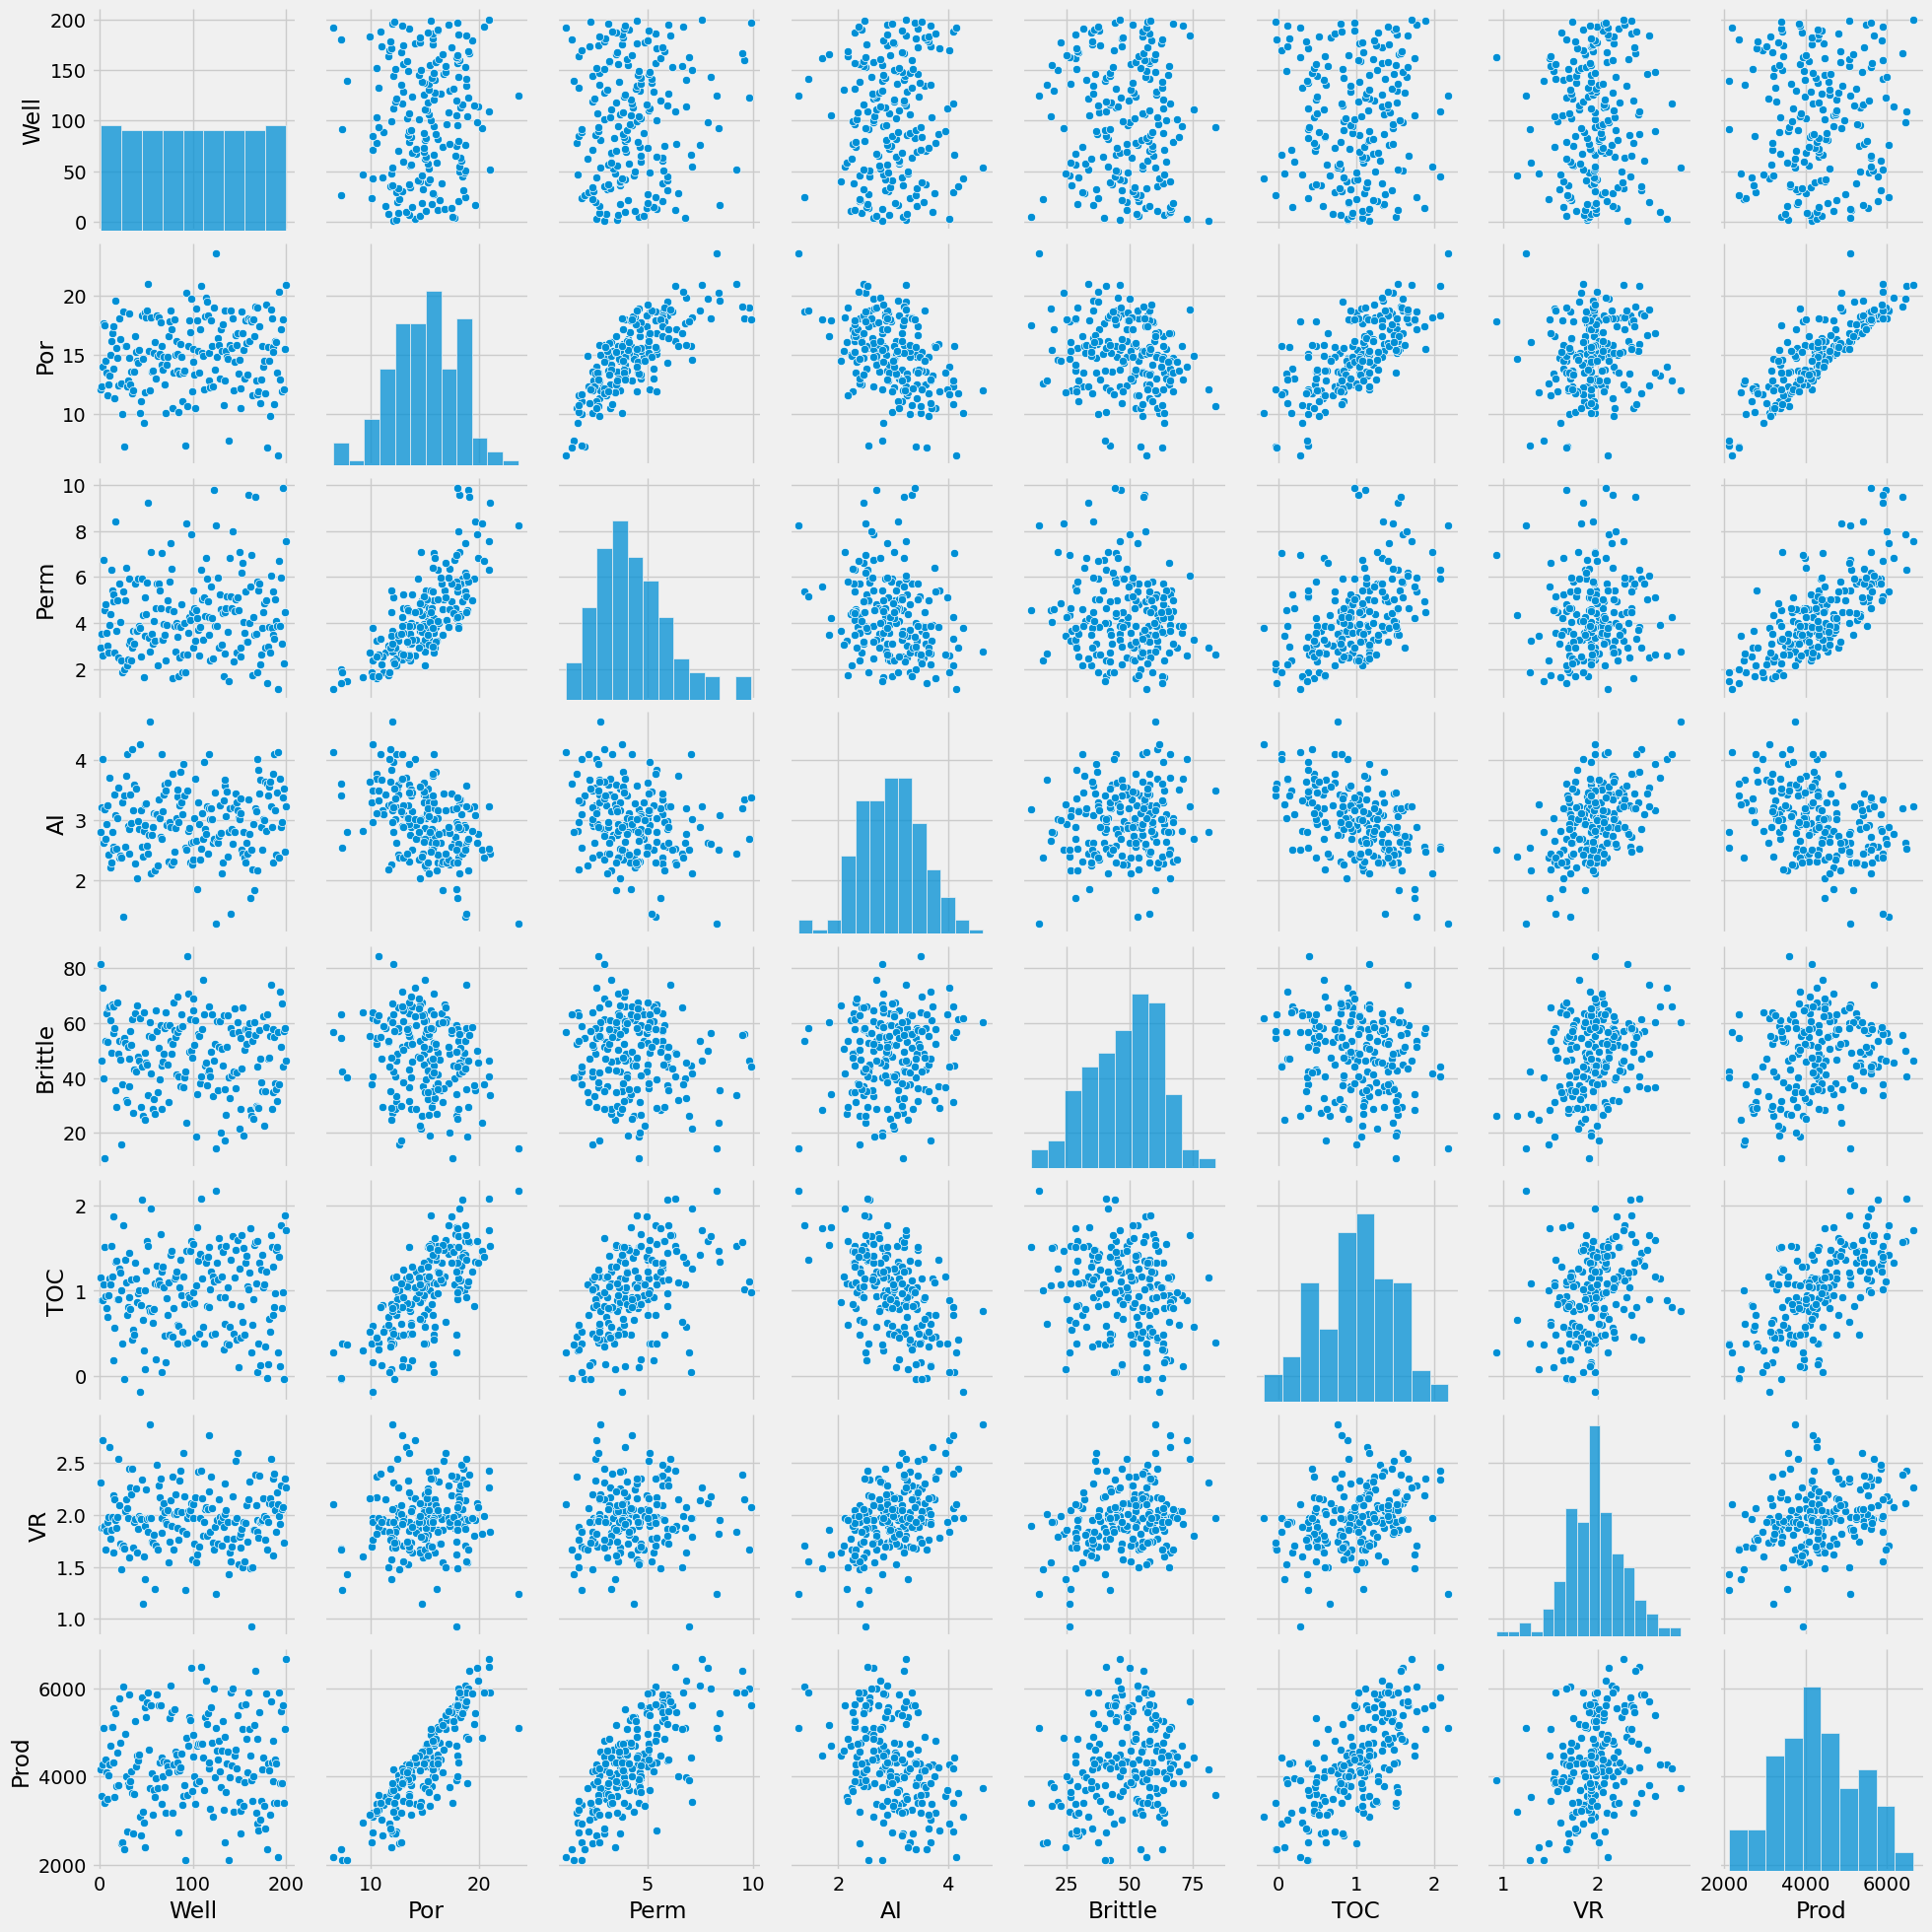

In [152]:
sns.pairplot(df)

### Description of headers

    Well : well index
    Por : well average porosity (%)
    Perm : permeability (mD)
    AI : accoustic impedance (kg/m2s*10^6)
    Brittle : brittleness ratio (%)
    TOC : total organic carbon (%)
    VR : vitrinite reflectance (%)
    Prod : gas production per day (MCFD)

### Data split into features and target variables

In [153]:
x = df.drop(['Prod'],axis=1)
y = df.iloc[:,-1]

In [154]:
x.shape

(200, 7)

In [155]:
y.shape

(200,)

### Data split into train and test

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [157]:
x_train .shape

(160, 7)

In [158]:
x_test.shape

(40, 7)

In [159]:
y_train.shape

(160,)

In [160]:
y_test.shape

(40,)

### Import RandomForestRegressor for permutation feature Importance plot

In [161]:
#from sklearn.linear_model import LinearRegression
model = RandomForestRegressor(n_estimators=100 , random_state = 0)

In [162]:
model

RandomForestRegressor(random_state=0)

In [163]:
model.fit(x_train ,y_train)

RandomForestRegressor(random_state=0)

In [164]:
y_pred = model.predict(x_test)

In [165]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , y_pred)

In [166]:
mse

30561.37558433721

In [167]:
rmse = np.sqrt(mse)

In [168]:
rmse

174.8181214415062

### code for find the score of feature importance

In [169]:
results = []
for i in x_test :
    # create a copy of x_test
    x_test_copy = x_test.copy()
    x_test_copy[i] = x_test[i].sample(frac=1).values
    new_mse = mean_squared_error(y_test , model.predict(x_test_copy))
    new_rmse = np.sqrt(new_mse)
    
    results .append({'pred':i,
                     'score':new_rmse - rmse})
    
resultsdf = pd.DataFrame(results).sort_values(by = 'score',ascending = False)
    
    

### from score we have to understand which features are important or make a  good impact on accuracy

In [170]:
resultsdf

,pred,score
1,Por,807.117615
4,Brittle,498.370088
2,Perm,46.258872
5,TOC,24.166684
6,VR,8.412786
3,AI,4.305051
0,Well,-6.052052


### Bar plot for graphical distribution of feature importance

Text(0.5, 1.0, 'Permutation Feature Importance Plot')

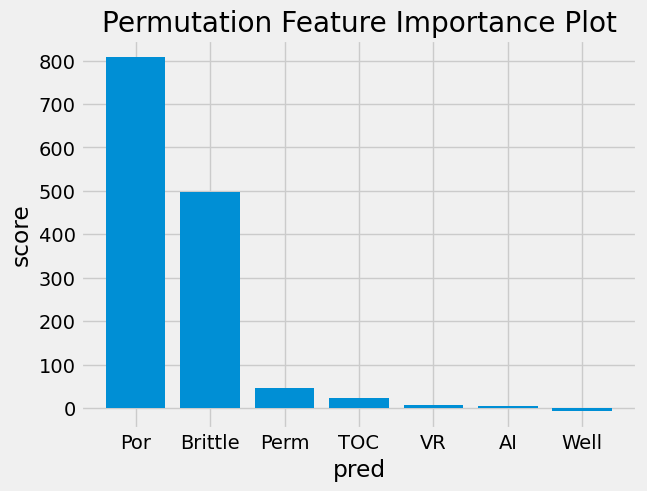

In [171]:
plt.bar(resultsdf['pred'] , resultsdf['score'])
plt.xlabel('pred')
plt.ylabel('score')
plt.title('Permutation Feature Importance Plot')

### Here we distribution of data into features and target variables for LinearRegression

In [172]:
# Here we select two features which is Por and Brittle
x = df.iloc[:,[1,4]]
y = pd.DataFrame(df.iloc[:,-1])

In [173]:
x.head(2)

,Por,Brittle
0,12.08,81.40
1,12.38,46.17


In [174]:
y.head(2)

,Prod
0,4165.196191
1,3561.146205


### import LinearRegression model

In [175]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [176]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [177]:
model1.fit(x_train , y_train)

LinearRegression()

### Training score of LinearRegression

In [178]:
model1.score(x_train ,y_train)

0.9349709934118597

### Testing score of LinearRegression

In [179]:
model1.score(x_test , y_test)

0.9221476593911364

###  Prediction output of LinearRegression model

In [180]:
y_pred1 = model1.predict(x_test)

In [181]:
y_pred = pd.DataFrame(y_pred1, columns = ['prediction_prod'])
# pd.DataFrame(y_test) , pd.DataFrame(y_pred,columns = ['mpg_prediction'])

In [182]:
y_pred.shape

(40, 1)

### compare prediction output and actual output

In [183]:
y_test , y_pred

(            Prod
 95   5350.949293
 15   3539.984263
 30   5859.748328
 158  4092.730535
 128  4118.586934
 115  5429.611220
 69   3767.102420
 170  2791.133133
 174  4158.294202
 45   3210.901380
 66   3376.283700
 182  3141.540928
 165  5175.599120
 78   4276.410007
 186  3899.879873
 177  2819.977847
 56   3146.528143
 152  5607.515490
 82   4319.787412
 68   4336.465709
 124  5107.668954
 16   5425.900608
 148  3950.292582
 93   3591.891958
 65   4431.905847
 60   5851.024387
 84   2734.773959
 67   3999.979330
 125  4590.775041
 132  3258.271193
 9    4285.026122
 18   4534.585915
 55   4079.994302
 75   6053.071368
 150  2705.868622
 104  4689.432240
 135  3655.497757
 137  4566.400754
 164  4013.751035
 76   5446.810082,
     prediction_prod
 0       5310.488613
 1       3449.575066
 2       5400.300005
 3       4079.814271
 4       4051.745920
 5       5223.394393
 6       3834.689289
 7       2742.818557
 8       4153.647225
 9       3561.594422
 10      3467.195444
 11      

### Evaluation metrics or cost function or performance metrics

In [184]:
from sklearn . metrics import mean_squared_error , mean_absolute_error , r2_score

### Mean Squared Error

In [185]:
mse1 = mean_squared_error(y_test , y_pred1)

In [186]:
mse1

65879.22807405524

### Root Mean Squared Error

In [187]:
rmse = np.sqrt(mse)

rmse

### R squared score

In [188]:
r2 = r2_score(y_test , y_pred1)

In [189]:
r2

0.9221476593911364

### check paiplot of por and Brittle

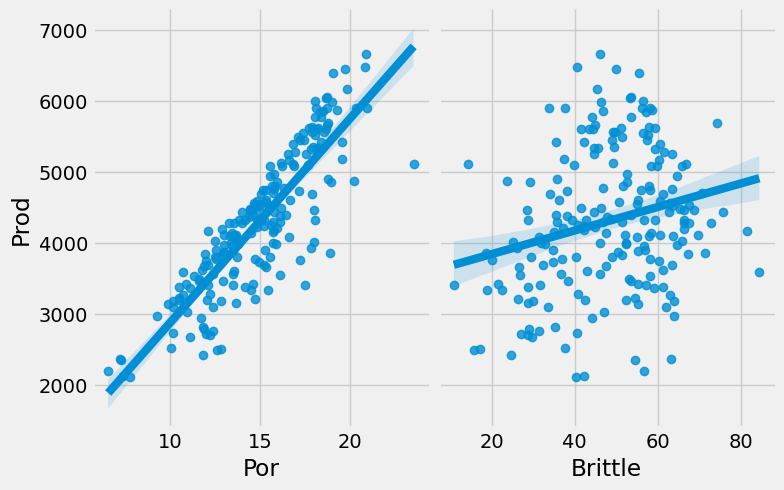

In [190]:
sns.pairplot(df, x_vars=["Por", "Brittle"], y_vars=["Prod"],
             height=5, aspect=.8, kind="reg");

### code for 3d view of multiple regression on basis of two features and target variable

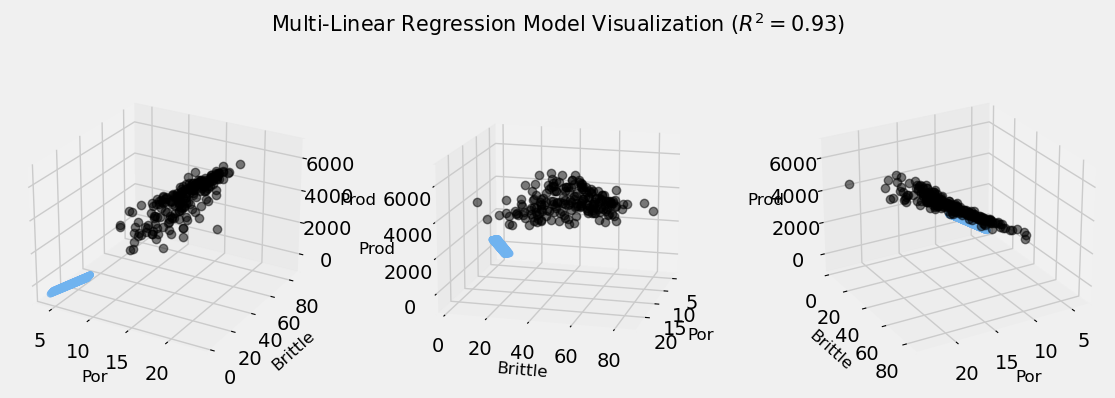

In [191]:
# Prepare data
X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(4, 9, 30)  # range of price values
yy_pred = np.linspace(2, 5, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model1.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model1.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Por', fontsize=12)
    ax.set_ylabel('Brittle', fontsize=12)
    ax.set_zlabel('Prod', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()